In [1]:
import pandas as pd
from PIL import Image
import pytesseract as tes
from pytesseract import Output
import pypdfium2 as pdfium
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utx import images
from utx.plot import plot
import pypdfium2 as pdfium
import cv2

def show(img):
    plt.imshow(img, cmap="gray")
    # plt.axis("off")
    plt.show()

def pdf_to_img(path: str):
    first_page = pdfium.PdfDocument(path).get_page(0)
    return first_page.render_to(
        pdfium.BitmapConv.pil_image, scale=3
    )
pdf_to_img(path).save("test.png")

NameError: name 'path' is not defined

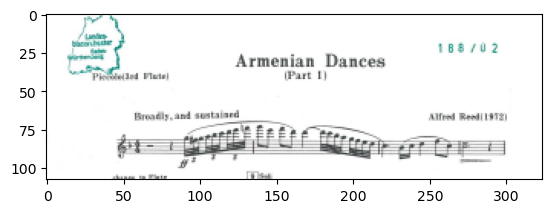

In [3]:
i = 5
path = "imgs/I Kenn Di Von Mein Handy 537.jpg"
# path = "imgs/Fuchsgraben-Polka 3.jpg"
# imgi = images.load_image(f"boxes/{i}_box_76.00.png")
imgi = images.load_image("imgs/I Kenn Di Von Mein Handy 537.jpg")
# imgi = np.asarray(pdf_to_img(path))
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img = rgb2gray(imgi)
plot.imshow(img, interpolation="none").noaxis().show()

In [5]:
from dataclasses import dataclass
from typing import Tuple


def get_corners(points: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    return points.min(0), points.max(0)


def rotate_image(img: np.ndarray, angle: float) -> np.ndarray:
    img = img.copy()
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return img


@dataclass
class Box:
    box: np.ndarray
    upper_left: np.ndarray
    lower_right: np.ndarray
    original: np.ndarray

    @property
    def pred(self):
        if hasattr(self, "_pred"):
            return self._pred
        self._pred = tes.image_to_string(self.box)
        return self._pred

    @property
    def area(self):
        return np.multiply(self.box.shape[:2])

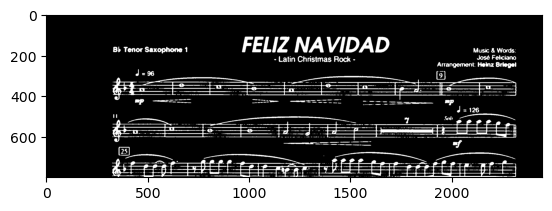

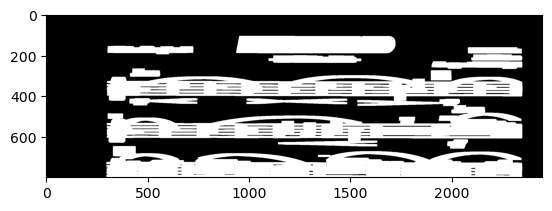

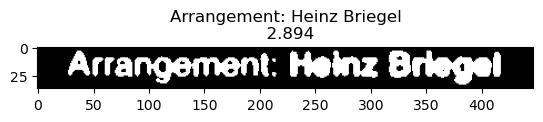

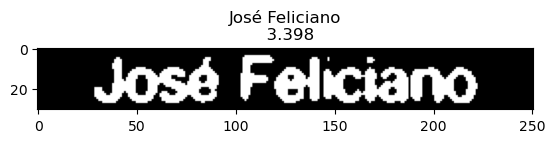

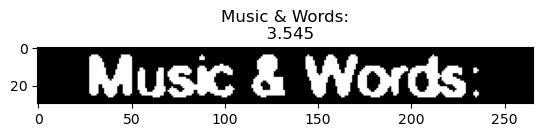

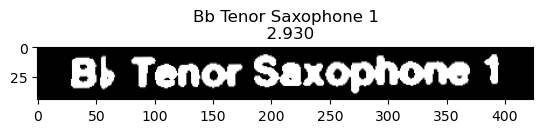

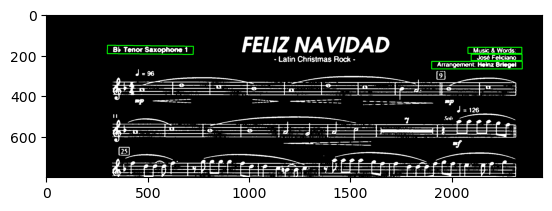

utx.plot.plot

In [44]:
path = "imgs/Feliz Navidad.jpg"
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (9, 9), 0)
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

plot.imshow(img).show()

# extract text areas
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
dilate = cv2.dilate(img.copy(), kernel, iterations=2)

plot.imshow(dilate).show()

# for contour in cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]:
#     points = np.int0(cv2.boxPoints(cv2.minAreaRect(contour)))
#     points[points < 0] = 0
#     (x1, y1), (x2, y2) = get_corners(points)
#     patch = dilate[y1:y2, x1:x2]
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch.shape[1]//30, 1))
#     modified = cv2.erode(patch, kernel, iterations=2)
#     if modified.sum()/patch.sum() > 0.22:
#         dilate[y1:y2, x1:x2] = cv2.erode(dilate[y1:y2, x1:x2].copy(), kernel, iterations=2)
#
# plot.imshow(dilate).title("RM").show()
#
# dilate = cv2.dilate(dilate.copy(), kernel, iterations=1)

colored_img = np.dstack([img]*3).copy()
angels = []
patches = []
## Draw
for contour in cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]:
    rect = cv2.minAreaRect(contour)
    angle = rect[-1] % 90
    if angle > 45:
        angle -= 90
    angels.append(angle)

    points = np.int0(cv2.boxPoints(rect))
    points[points < 0] = 0
    (a1, b1), (a2, b2) = get_corners(points)

    patch = rotate_image(img[b1:b2, a1:a2], angle)
    dilate_patch = rotate_image(dilate[b1:b2, a1:a2], angle)
    title = tes.image_to_string(patch)
    patches.append(patch)
    if title:
        plot.imshow(patch).title(f"{title} {dilate_patch.sum()/patch.sum(): .3f}").show()
        colored_img = cv2.polylines(
            colored_img, [points.reshape((-1, 1, 2))],
            isClosed=True, color=(0,255,0), thickness=4)

plot.imshow(colored_img).show()
# angels, np.mean(angels)

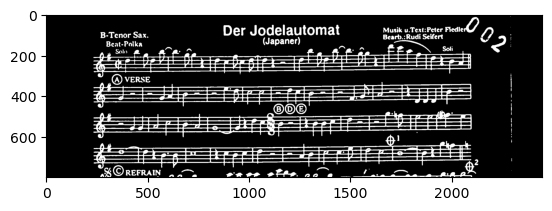

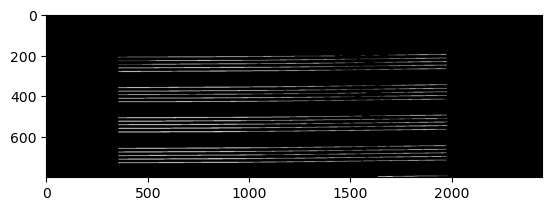

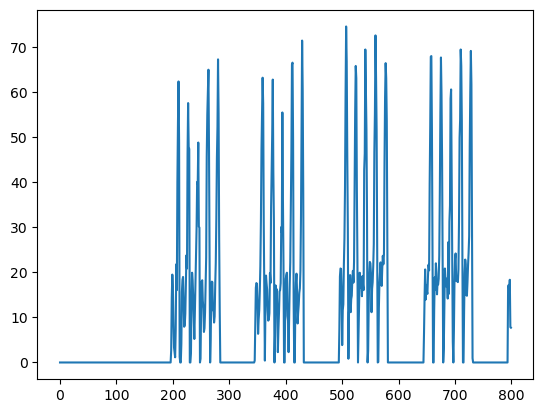

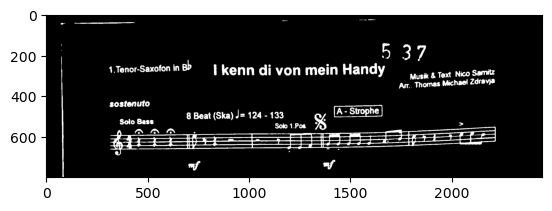

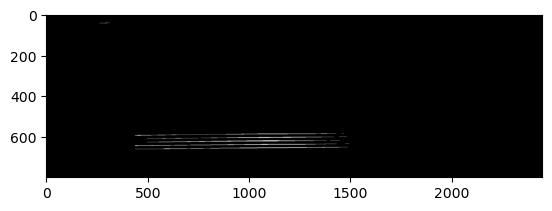

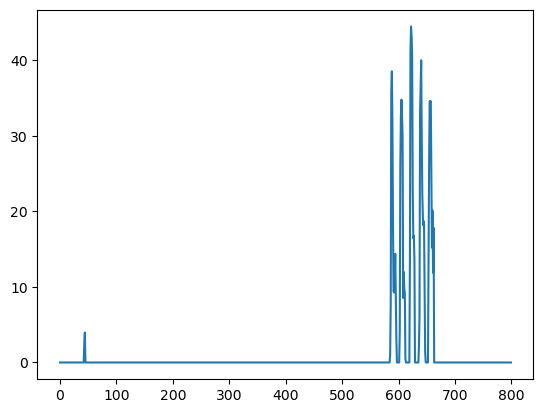

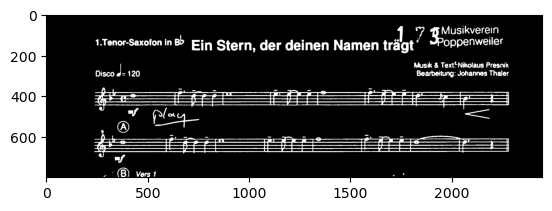

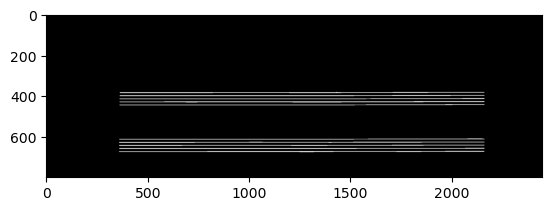

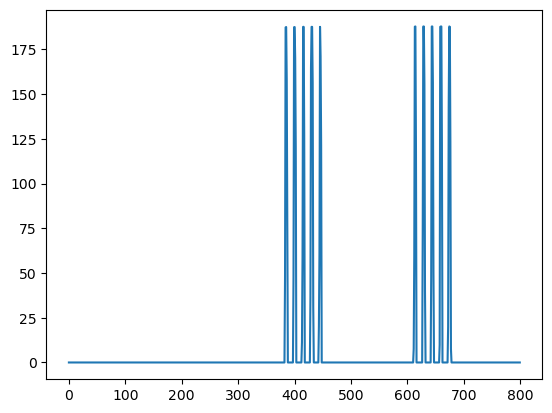

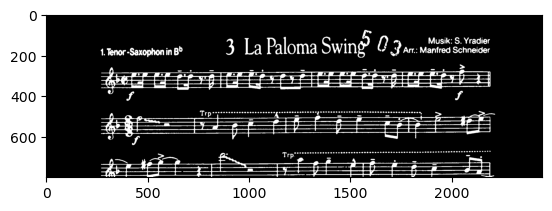

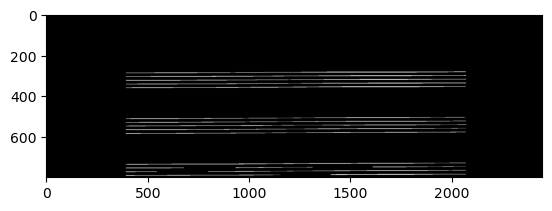

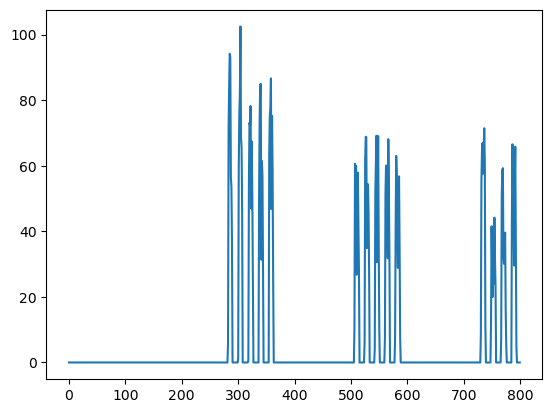

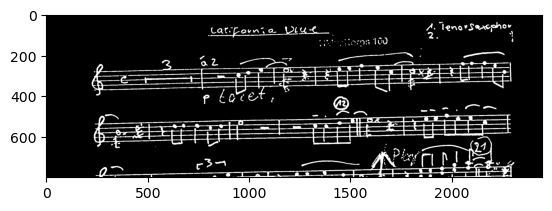

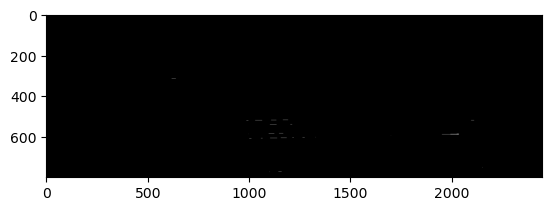

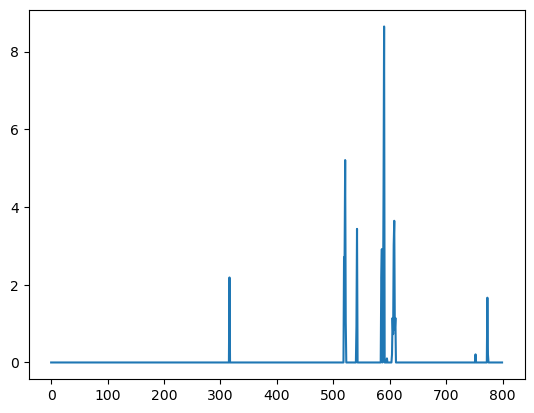

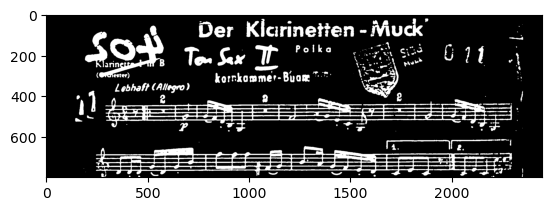

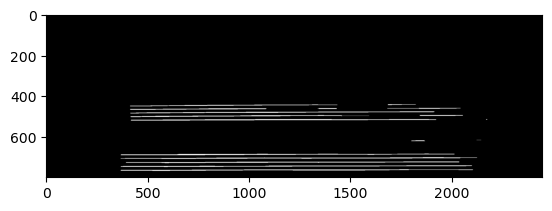

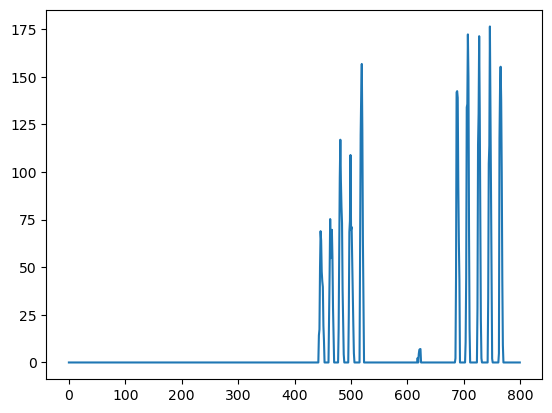

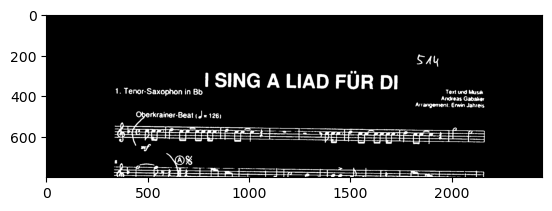

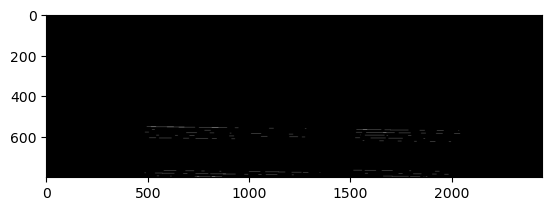

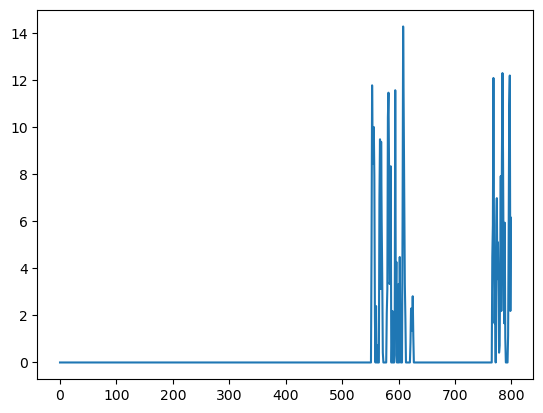

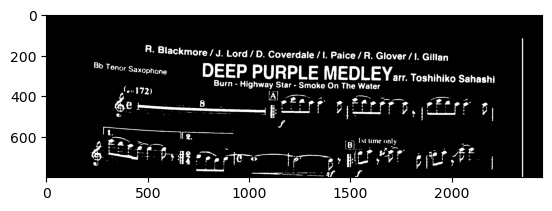

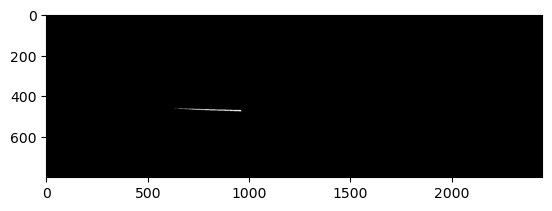

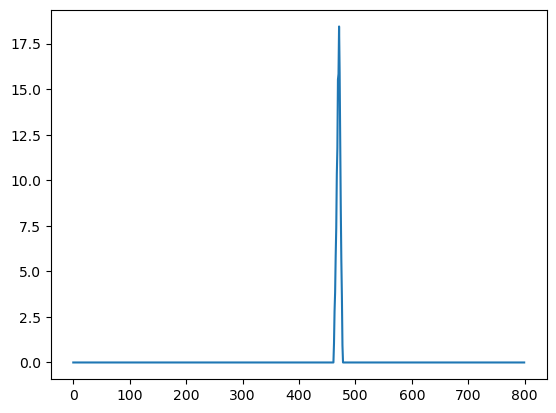

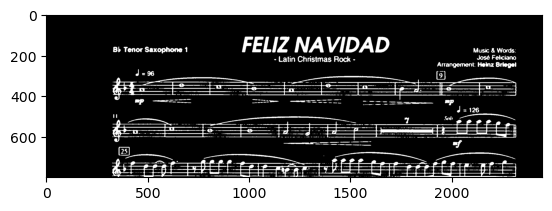

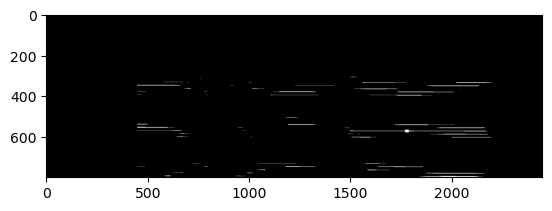

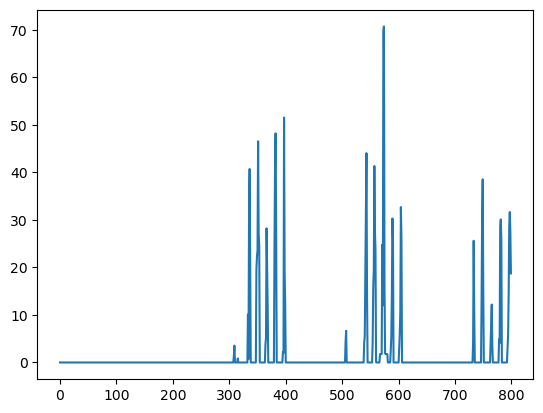

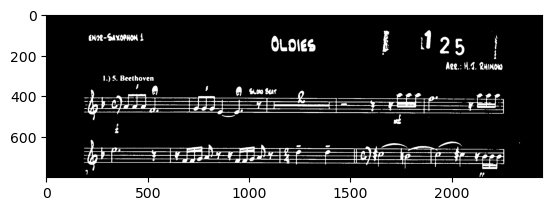

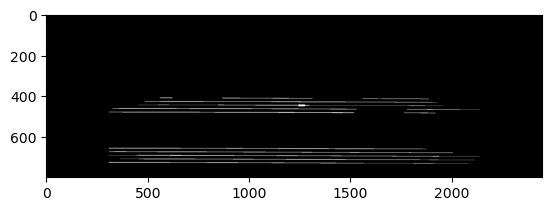

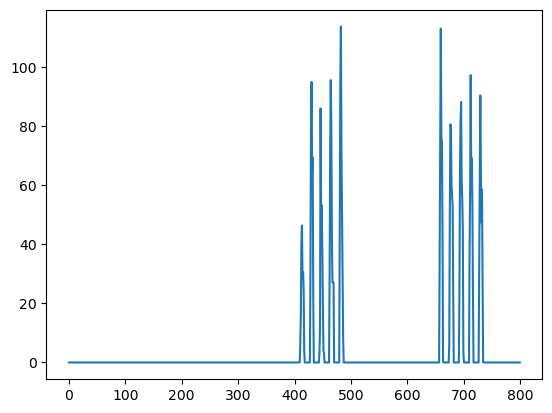

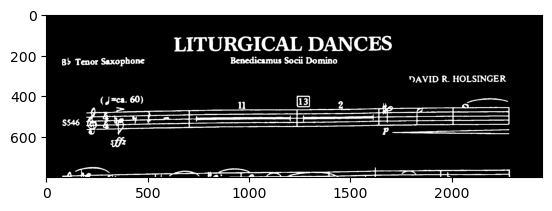

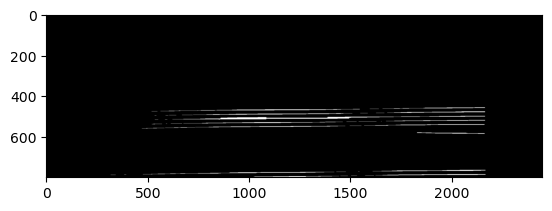

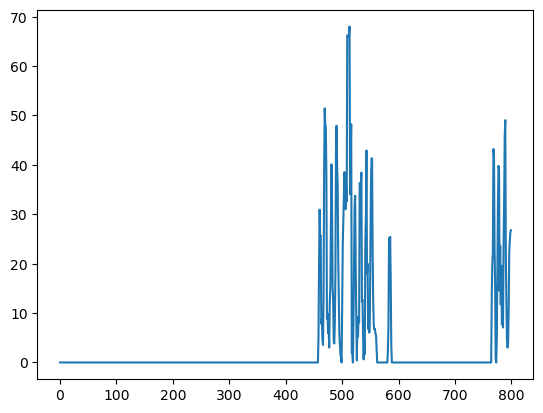

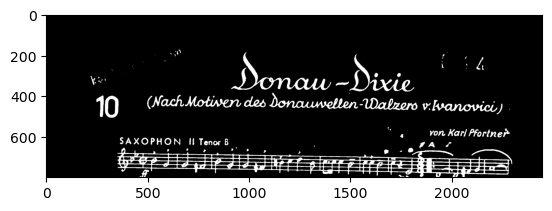

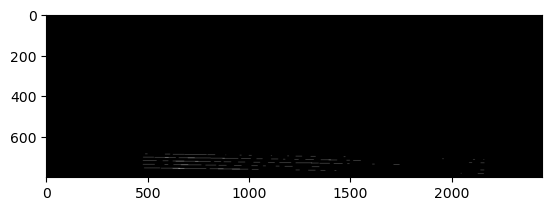

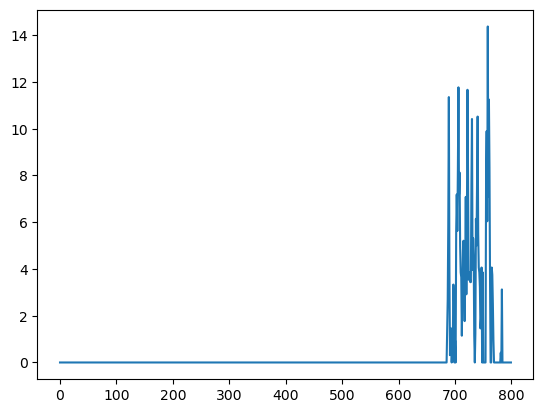

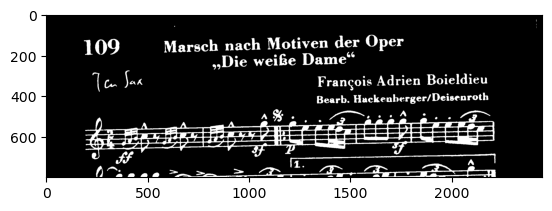

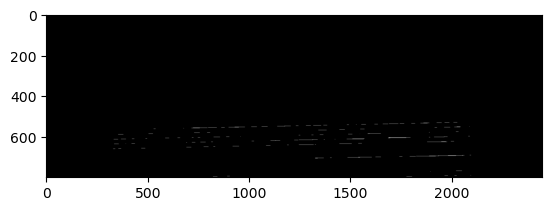

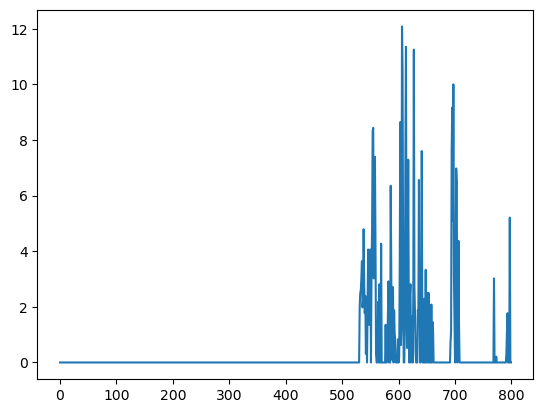

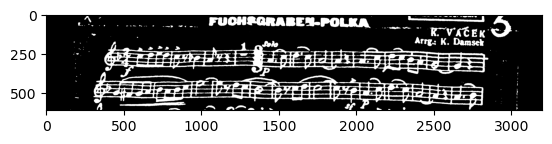

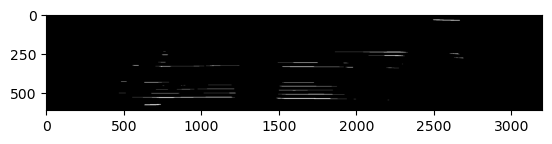

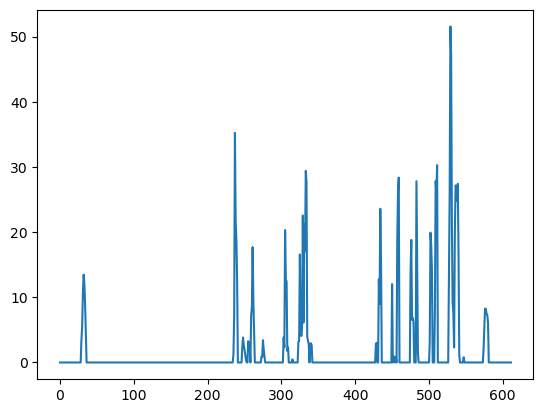

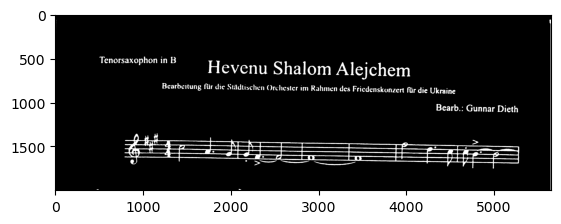

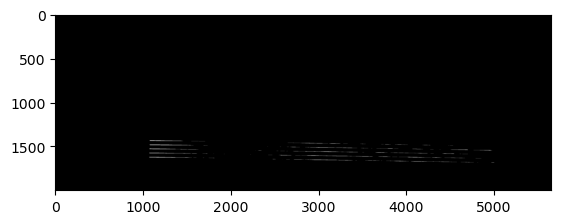

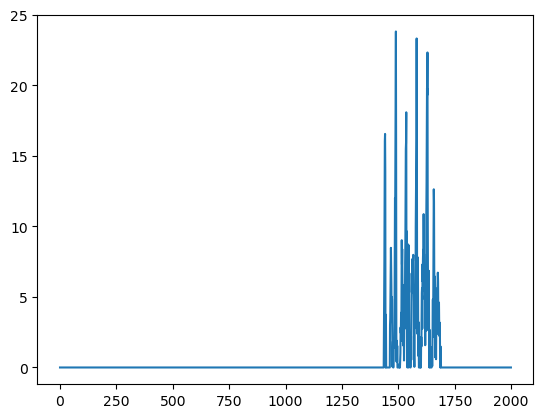

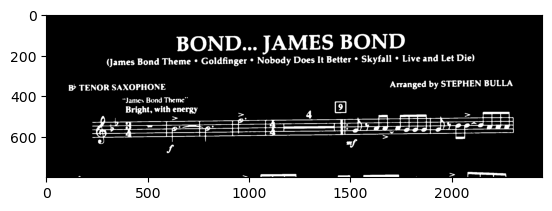

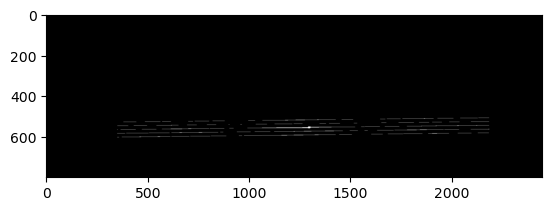

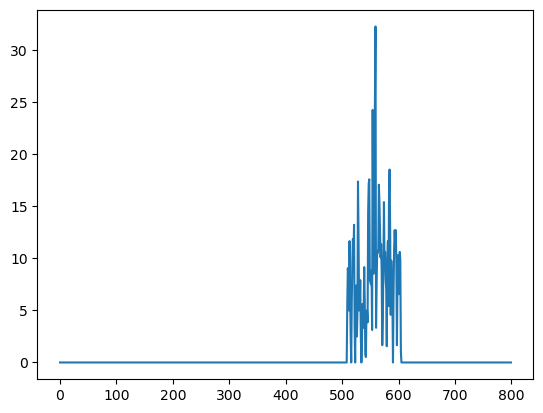

In [49]:
def find_th():
    from utx import osutil
    for img_path in osutil.list_files_recursively("imgs"):
        img = cv2.cvtColor(cv2.imread(f"imgs/{img_path}"), cv2.COLOR_BGR2GRAY)
        img = cv2.GaussianBlur(img, (9, 9), 0)
        img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

        plot.imshow(img).show()
        line = cv2.getStructuringElement(cv2.MORPH_RECT, (img.shape[1]//10, 1))
        only_score_lines = cv2.erode(img, line, iterations=1)
        plot.imshow(only_score_lines).show()
        plt.plot(only_score_lines.mean(1))
        plt.show()
find_th()

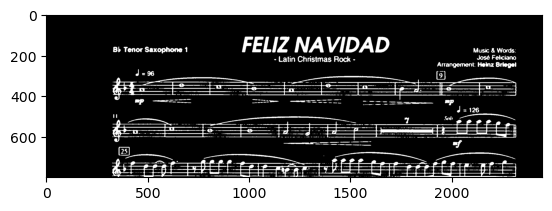

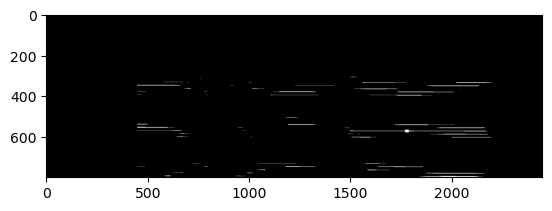

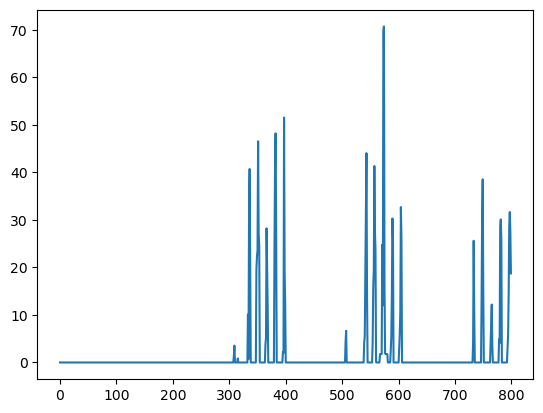

In [46]:
plot.imshow(img).show()
line = cv2.getStructuringElement(cv2.MORPH_RECT, (img.shape[1]//10, 1))
only_score_lines = cv2.erode(img, line, iterations=1)
plot.imshow(only_score_lines).show()
plt.plot(only_score_lines.mean(1))

0


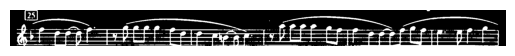

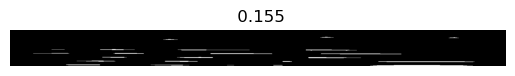

1


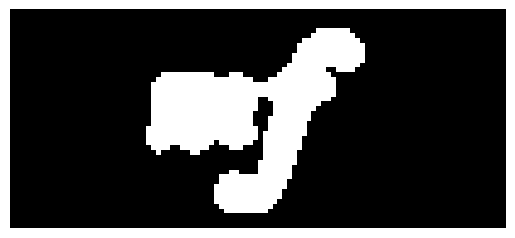

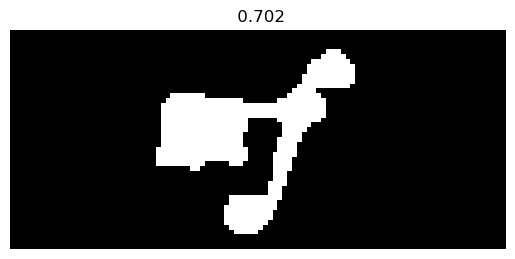

2


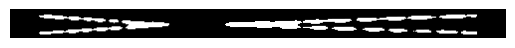

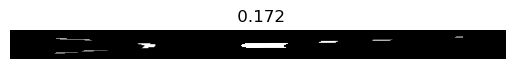

3


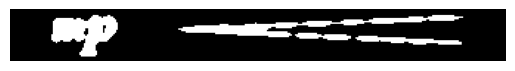

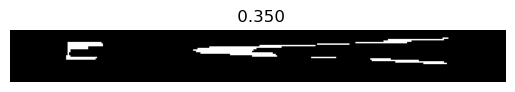

4


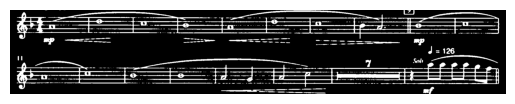

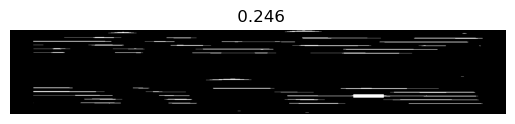

5


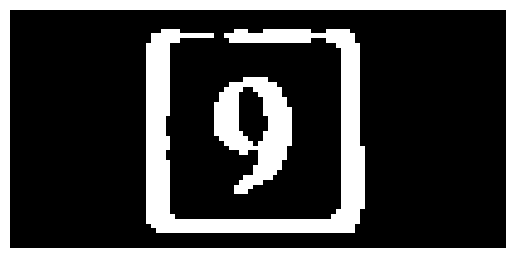

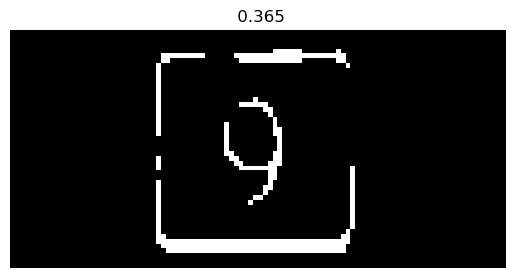

6


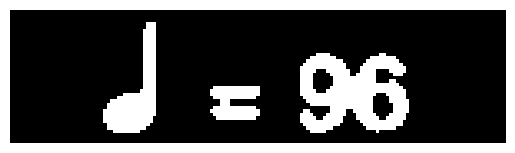

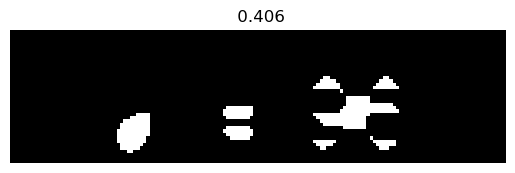

7


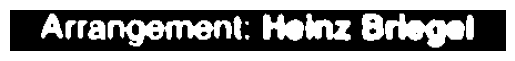

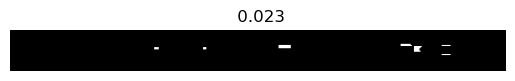

8


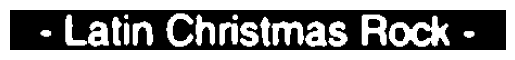

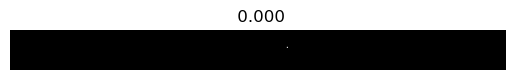

9


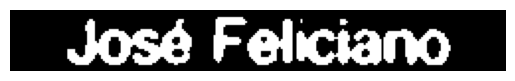

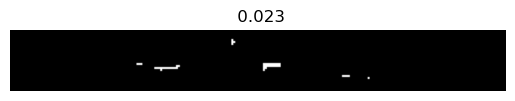

10


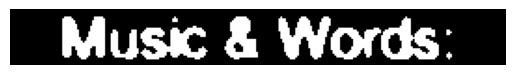

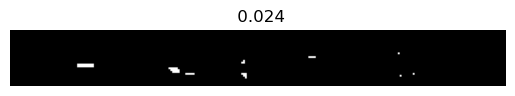

11


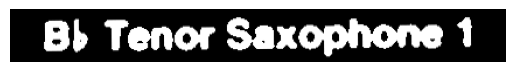

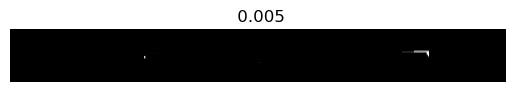

12


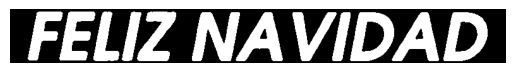

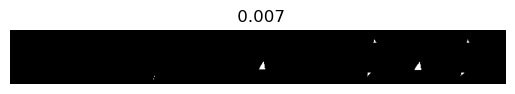

In [228]:
for i in range(len(patches)):
    print(i)
    patch = patches[i].copy()
    plot.imshow(patch).noaxis().show()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ( patch.shape[1]//30, 1))
    patch2 = cv2.erode(patch, kernel, iterations=2)
    plot.imshow(patch2).title(f"{patch2.sum()/patch.sum(): .3f}").noaxis().show()

In [215]:
# plot.imshow(255 - patch2).show()


dtype('uint8')

In [51]:
import ocr
import pytesseract as tes

data_df = tes.image_to_data(
        img, output_type=Output.DATAFRAME
).dropna()
data_df["text"]

4                 5
5                37
9                 1
10    Tenor-Saxofon
11              in®
12                |
13             Kenn
14               di
15              von
16             mein
17            Handy
18             dunk
19                &
20             Text
21             Nico
22             Semi
24              Ar.
25           Thomas
26          Michael
27         Zdravyja
31        sostenuto
35                8
36             Beat
37            (Ska)
38               J=
39              124
40                -
41              133
42               [A
43                -
44          Strophe
45                |
49             Solo
50             Bass
51               wd
53             Solo
54            1.Pos
55                >
59                 
61                 
65                 
69                 
73                 
77                 
81             Sree
85                 
Name: text, dtype: object

23900450303.65828

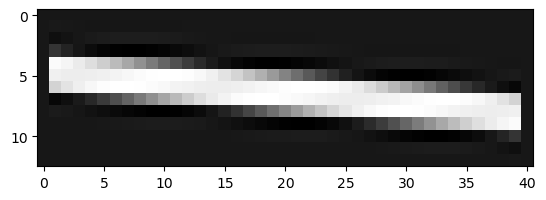

In [77]:
# import numpy as np
# from scipy.ndimage import rotate
# from scipy.signal import convolve2d
#
#
# def get_rotation_kernel(degree: float) -> np.ndarray:
#     kernel = -np.ones((10, 40))
#     half = kernel.shape[0]//2
#     kernel[half-1:half+2,:] = 3
#     return rotate(kernel, degree, cval=-1)
#
# to_min = lambda deg: -np.sum(convolve2d(img, get_rotation_kernel(deg), mode="valid"))
# plot.imshow(get_rotation_kernel(-5))
# to_min(10)

In [87]:
# from scipy import optimize
#
# optimize.minimize_scalar(to_min, bounds=(-5, 5))

     fun: -79168197600.00002
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 42
     nit: 38
 success: True
       x: 0.0

line degree 0.0
line degree 0.0
line degree 89.13194855025446
line degree 0.0
line degree -0.795723552739274
line degree 0.0
line degree 0.9548412538721887
line degree 0.0
line degree 0.0
line degree -0.7440592028887094
line degree 0.0
line degree -0.9793196543394875
line degree 0.0
line degree 0.0
line degree -0.5070290609147756
line degree 0.0
line degree -0.6700955222245337
line degree -1.9749340108819768
line degree 0.0
line degree 0.0
line degree -0.5070290609147756
line degree 0.0
line degree 0.0
line degree 0.0
line degree -0.7742201649280623
line degree -0.8896145214143647
line degree 0.0
line degree 0.0
line degree 0.0
line degree 0.0
line degree 0.0
line degree 0.0
line degree -0.5070290609147756
line degree 0.0
line degree 0.0
line degree 89.085783239551
line degree 0.0
line degree 0.0
line degree -1.507435758774968
line degree 0.0
line degree 0.0
line degree 0.0
line degree 0.0
line degree 0.0
line degree -0.5070290609147756
line degree 0.0
line degree 0.0
line degree 0.0
l

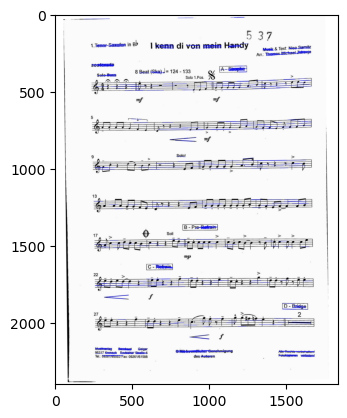

utx.plot.plot

In [28]:
# import cv2, math
#
# image = cv2.imread("test.png")
#
# dst = cv2.Canny(image, 50, 200, None, 3)
# linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
#
# if linesP is not None:
#     for i in range(0, len(linesP)):
#         l = linesP[i][0]
#
#         #here l contains x1,y1,x2,y2  of your line
#         #so you can compute the orientation of the line
#         p1 = np.array([l[0],l[1]])
#         p2 = np.array([l[2],l[3]])
#
#         p3 = np.subtract( p2,p1 ) #translate p2 by p1
#
#         angle_radiants = math.atan2(p3[1],p3[0])
#         angle_degree = angle_radiants * 180 / math.pi
#
#         print("line degree", angle_degree)
#
#         if 0 < angle_degree < 15 or 0 > angle_degree > -15 :
#             cv2.line(image,  (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA)
#
#
# plot.imshow(image).show()

In [5]:
# img = images.load_image("imgs/Deep Purple Medley.jpg")
# img = rgb2gray(img)
# plot.imshow(img).noaxis().show()

In [4]:
from scipy.stats import gaussian_kde
from scipy import optimize


def image_as_binary(img: np.ndarray) -> np.ndarray:
    color_distr = gaussian_kde(img.reshape(-1)/255)
    threshold = optimize.fmin(color_distr, .5, disp=False)
    return img > threshold * 255


def get_font_size(box: np.ndarray) -> np.ndarray:
    min_line = image_as_binary(box).min(axis=0)
    # remove white columns on the borders (so letter starts and ends at the borders)
    min_line = min_line[min_line.argmin():-min_line[::2].argmin()]
    return np.median(
        np.diff(  # compute the length of the black/white regions
            np.where(  # select indices where there is change from black to white and vice versa
                min_line[:-1] != min_line[1:]
            )[0]  # returns 1d-tuple
        )[::2]  # only take the black area lengths
    )  # use the median as most spaces will be between chars and not whitespaces

Optimization terminated successfully.
         Current function value: 0.045084
         Iterations: 9
         Function evaluations: 19


(array([0.52275391]), 43.0)

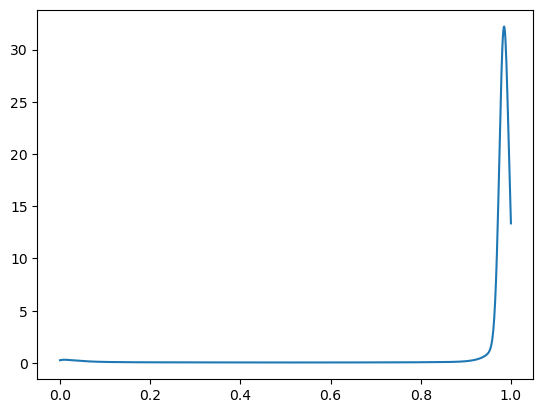

In [12]:
kernerl = gaussian_kde(img.reshape(-1)/255)
th = optimize.fmin(kernerl, 0.5, disp=False)
x = np.linspace(0, 1, 1000)
Dx = np.gradient(kernerl(x), .01)
(plot(0, 1, 1000)
 .function(kernerl, label="kde")
 .plot(Dx, label="d/dx")
 .legend()
 .show()
)
th, get_font_size(img)

-87.74590301513672


AttributeError: 'AxesImage' object has no property 'grayscale'

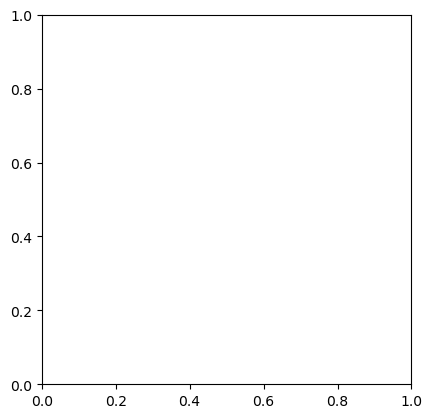

In [115]:
import cv2

# Calculate skew angle of an image
def get_skew_angel(img: np.ndarray) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    img = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (9, 9), 0)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(img, kernel, iterations=5)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)

    # Find the largest contour and surround in min area box
    largest_contour = contours[0]
    minAreaRect = cv2.minAreaRect(largest_contour)

    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle += 90
    return -1.0 * angle

# Deskew image
def deskew(img: np.ndarray) -> np.ndarray:
    angle = get_skew_angel(img)
    print(angle)
    return rotate_image(img, -1.0 * angle)

plot.imshow(deskew(cv2.cvtColor(imgi, cv2.COLOR_RGB2BGR)), grayscale=True).noaxis().show()
plot.imshow(imgi).noaxis().show()

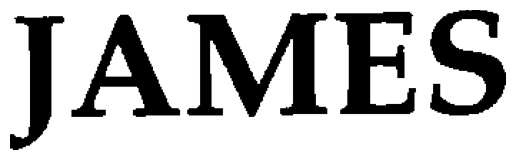

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'dilate'
> Overload resolution failed:
>  - src is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'src'


In [86]:
plot.imshow(image_as_binary(img), grayscale=True).noaxis().show()

[ 5.01064422  5.27687446  5.53632495  7.48405031 10.        ]


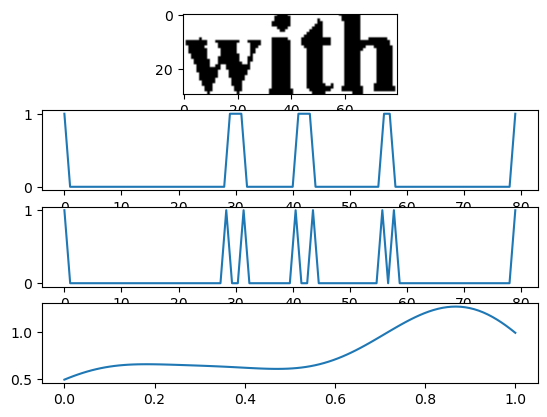

((30, 80), 0.60125)

In [37]:
im = img>th*255

A = np.fft.rfft(im.min(0))
print(np.abs(A[np.abs(A).argsort()[-5:]]))
A[np.abs(A).argsort()[:-3]] = 0
B = np.fft.irfft(A)

plt.subplot(411)
plot.imshow(im)
plt.subplot(412)
plot(0, im.shape[1]-1, im.shape[1]).plot(im.min(0))#.plot(B)
plt.subplot(413)
plot(0, im.shape[1]-1, 79).plot(condition[:-1] != condition[1:])
plt.subplot(414)
plot(0, 1).function(gaussian_kde(im.mean(0))).show()
# plt.subplot(414)
# imx = im.copy()
# imx = imx[imx.mean(1)<.90]
# plot.imshow(imx[:470]).show()

im.shape, im.mean()

In [44]:
condition = im.min(0)
condition = condition[condition.argmin():-condition[::-1].argmin()]
np.median(np.diff(np.where(np.concatenate(([condition[0]],
                                     condition[:-1] != condition[1:],
                                     [True])))[0])[::2])

3.0

In [30]:
np.diff(np.where(np.concatenate(([condition[0]], condition[:-1] != condition[1:], [True])))[0])[::2]

array([1, 3, 3, 2, 1])

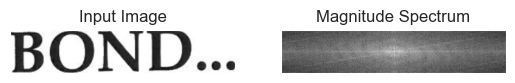

In [90]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Result in JET'), ([], []), ([], []))

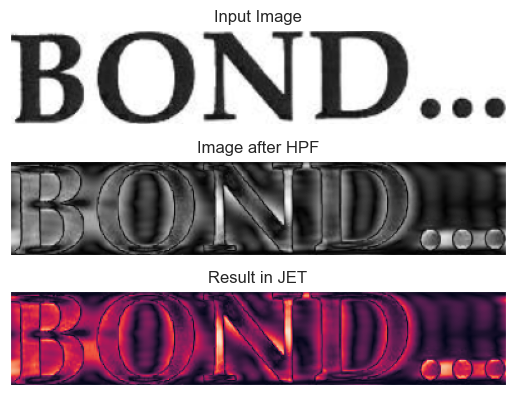

In [91]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
window = 10
fshift[crow-window:crow+window, ccol-window:ccol+window] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(311),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])